## 作業
當銀行收到貸款申請時，必須根據客戶的個人檔案決定是否應該要核准貸款

如果客戶信用良好，批准貸款 如果客戶信用較差，不批准貸款 透過分析目的，可將低銀行風險、提升潛在獲利

現有一資料集 Creditability (https://raw.githubusercontent.com/ywchiu/tibamepy/master/data/Creditability.csv)

包含客戶特徵

- Account Balance(帳戶餘額): 沒有帳號(1), 沒有餘額 (2), 部分存款 (3)
- Payment Status(付款狀況): 有問題 (1), 付清 (2), 於該銀行沒有問題(3)
- Savings/Stock Value (存款): 沒有, 少於 100, 100 ~ 1,000, 高於1,000
- Employment Length(工作長短): 少於 1 年, 1 ~ 4年, 4 ~ 7年, 高於 7 年
- Sex/Marital Status(性別與婚姻): 男生/女生, 單身/離婚/已婚/鰥夫
- No of Credits at this bank(貸款數): 1, >1
- Guarantor(保人): None, Yes
- Concurrent Credits(其他貸款數): 其他銀行或百貨, None
- ForeignWorker (外國工作者)
- Purpose of Credit(貸款目的): New car, Used car, Home Related, Other
預測目標

- Creditability (可信客戶): 1/0


請用Python 回答以下問題：

- 使用Pandas 將資料讀取到一名為 df 的 DataFrame 中
- 請使用Pandas 統計男女別的平均 Credit.Amount
- 請使用邏輯式迴歸建立模型 (目標 y 為 Creditability)
- 請計算出模型準確度(Accuracy)?

In [0]:
import pandas
df = pandas.read_csv('https://raw.githubusercontent.com/ywchiu/tibamepy/master/data/Creditability.csv', index_col = 0)

In [4]:
df.head()

,Creditability,Account.Balance,Duration.of.Credit..month.,Payment.Status.of.Previous.Credit,Purpose,Credit.Amount,Value.Savings.Stocks,Length.of.current.employment,Instalment.per.cent,Sex...Marital.Status,Guarantors,Duration.in.Current.address,Most.valuable.available.asset,Age..years.,Concurrent.Credits,Type.of.apartment,No.of.Credits.at.this.Bank,Occupation,No.of.dependents,Telephone,Foreign.Worker
497,1,3,6,2,3,2108,1,3,2,3,1,2,1,29,2,1,1,1,1,1,1
756,0,1,15,1,4,950,1,4,4,2,1,3,3,33,2,1,2,1,2,1,1
580,0,1,42,2,3,7174,4,3,4,1,1,3,3,30,2,2,1,1,1,2,1
833,0,3,36,3,4,7980,4,1,4,2,1,4,3,27,2,1,2,1,1,2,1
602,1,3,24,3,2,2028,1,3,2,2,1,2,2,30,2,2,2,1,1,1,1


In [5]:
# SELECT sex, AVG(credit.amount) FROM df GROUP BY sex;
df.groupby('Sex...Marital.Status')['Credit.Amount'].mean()

Sex...Marital.Status
1    2896.327684
2    3694.981685
3    1993.360000
Name: Credit.Amount, dtype: float64

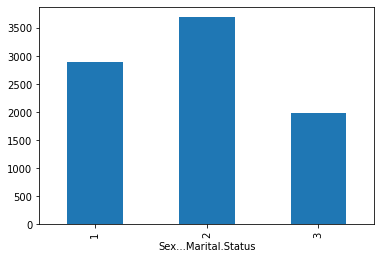

In [6]:
df.groupby('Sex...Marital.Status')['Credit.Amount'].mean().plot(kind = 'bar')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 497 to 385
Data columns (total 21 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Creditability                      500 non-null    int64
 1   Account.Balance                    500 non-null    int64
 2   Duration.of.Credit..month.         500 non-null    int64
 3   Payment.Status.of.Previous.Credit  500 non-null    int64
 4   Purpose                            500 non-null    int64
 5   Credit.Amount                      500 non-null    int64
 6   Value.Savings.Stocks               500 non-null    int64
 7   Length.of.current.employment       500 non-null    int64
 8   Instalment.per.cent                500 non-null    int64
 9   Sex...Marital.Status               500 non-null    int64
 10  Guarantors                         500 non-null    int64
 11  Duration.in.Current.address        500 non-null    int64
 12  Most.valuable.availa

In [9]:
df.isna().sum()

Creditability                        0
Account.Balance                      0
Duration.of.Credit..month.           0
Payment.Status.of.Previous.Credit    0
Purpose                              0
Credit.Amount                        0
Value.Savings.Stocks                 0
Length.of.current.employment         0
Instalment.per.cent                  0
Sex...Marital.Status                 0
Guarantors                           0
Duration.in.Current.address          0
Most.valuable.available.asset        0
Age..years.                          0
Concurrent.Credits                   0
Type.of.apartment                    0
No.of.Credits.at.this.Bank           0
Occupation                           0
No.of.dependents                     0
Telephone                            0
Foreign.Worker                       0
dtype: int64

In [11]:
df.select_dtypes('object')

""
497
756
580
833
602
...
269
425
43
516


In [0]:
Y = df.iloc[:,0]
X = df.iloc[:,1:]

In [13]:
X.shape

(500, 20)

In [14]:
Y.shape

(500,)

In [15]:
df.shape

(500, 21)

In [0]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()

In [17]:
clf.fit(X,Y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
predicted = clf.predict(X)

In [22]:
(predicted == Y).sum() / len(Y)

0.798

## 類神經網路

In [0]:
from sklearn.datasets import load_digits
digits = load_digits()

In [24]:
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [27]:
digits.images.shape

(1797, 8, 8)

In [25]:
digits.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

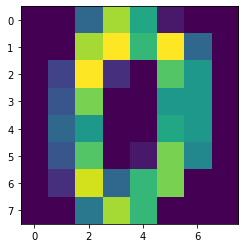

In [28]:
from matplotlib import pyplot as plt
plt.imshow(digits.images[0])

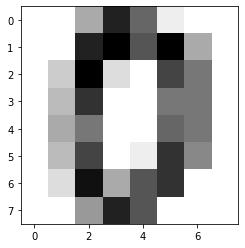

In [30]:
from matplotlib import pyplot as plt
plt.imshow(digits.images[0],cmap=plt.cm.binary)

In [32]:
digits.target[0]

0

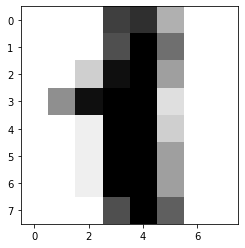

In [33]:
from matplotlib import pyplot as plt
plt.imshow(digits.images[1],cmap=plt.cm.binary)

In [34]:
digits.target[1]

1

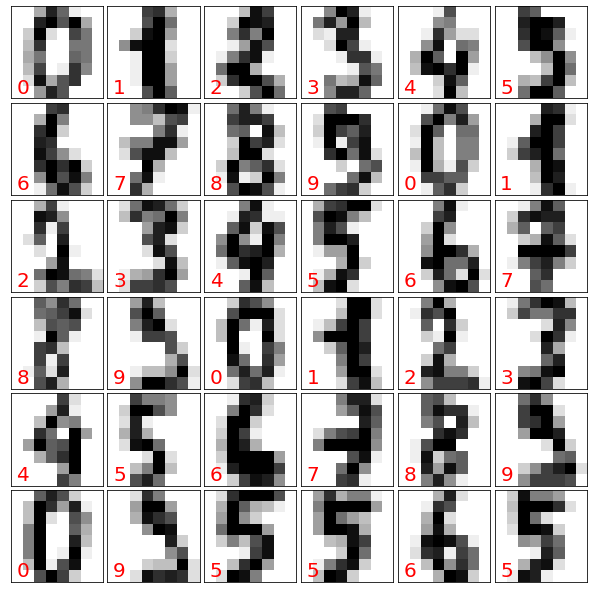

In [35]:
fig = plt.figure(figsize = (8,8))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
for i in range(36):
  ax = fig.add_subplot(6, 6, i+1, xticks=[], yticks=[])
  ax.imshow(digits.images[i],cmap=plt.cm.binary,interpolation='nearest')
  ax.text(0, 7, str(digits.target[i]), color="red", fontsize = 20)

In [0]:
# standard scalar
# x - mu / std

In [38]:
from sklearn.preprocessing import StandardScaler
import numpy as np
a = np.array([[50], [60], [70]])
sc = StandardScaler()
sc.fit_transform(a)

array([[-1.22474487],
       [ 0.        ],
       [ 1.22474487]])

In [39]:
a.mean()

60.0

In [41]:
(a - a.mean()) / a.std()

array([[-1.22474487],
       [ 0.        ],
       [ 1.22474487]])

In [43]:
a = np.array([[50], [60], [70]])
sc = StandardScaler()
sc.fit_transform(a)

array([[-1.22474487],
       [ 0.        ],
       [ 1.22474487]])

In [45]:
a2 = np.array([[1000000], [0], [2000000]])
sc = StandardScaler()
sc.fit_transform(a2)

array([[ 0.        ],
       [-1.22474487],
       [ 1.22474487]])

In [47]:
digits.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [49]:
digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [50]:
digits.data.shape

(1797, 64)

In [51]:
digits.target.shape

(1797,)

In [0]:
sc = StandardScaler()
X_scaled = sc.fit_transform(digits.data)

In [62]:
from sklearn.neural_network import MLPClassifier
# X:64 => H1:30 => H2:30 => H3:30 => Y:10
mlp = MLPClassifier(hidden_layer_sizes=(30,30,30), activation='relu', max_iter = 100)
mlp.fit(X_scaled, digits.target)

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(30, 30, 30), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=100,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

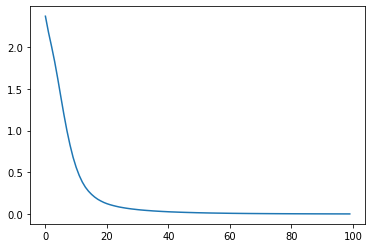

In [67]:
plt.plot(range(len(mlp.loss_curve_)), mlp.loss_curve_)

In [0]:
predicted = mlp.predict(X_scaled)

In [64]:
(predicted  == digits.target).sum() / len(digits.target)

1.0

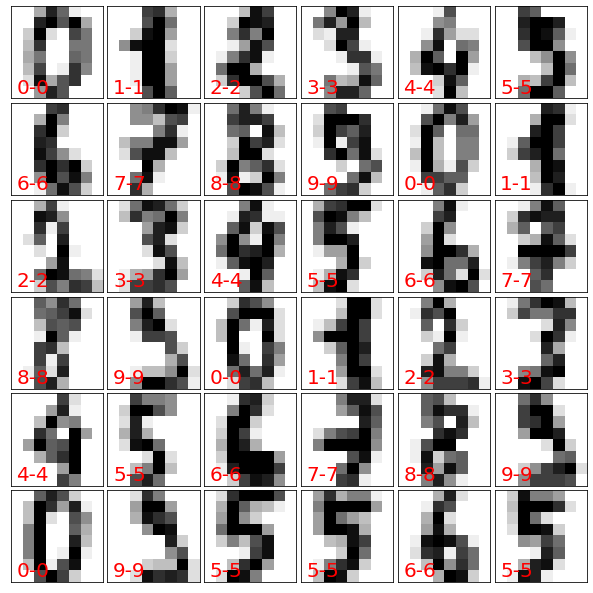

In [68]:
fig = plt.figure(figsize = (8,8))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
for i in range(36):
  ax = fig.add_subplot(6, 6, i+1, xticks=[], yticks=[])
  ax.imshow(digits.images[i],cmap=plt.cm.binary,interpolation='nearest')
  ax.text(0, 7, str('{}-{}'.format(digits.target[i],predicted[i])), color="red", fontsize = 20)

In [74]:
mlp.coefs_[0].shape

(64, 30)

In [76]:
mlp.coefs_[1].shape

(30, 30)

In [77]:
mlp.coefs_[2].shape

(30, 30)

In [78]:
mlp.coefs_[3].shape

(30, 10)